# Big Mart Sales - Final Model Comparison

After Hyperparameter Tuning we have concluded that, best hyperparameters for:

**1. Decision Tree :**
* max_depth = 6
* min_samples_split = 20
* min_samples_leaf = 67

**2. Random Forest :**
* n_estimators : 260
* max_depth : 6
* min_samples_split : 5
* min_samples_leaf : 24

**3. XGBoost :**
* n_estimators: 300
* max_depth: 4
* min_child_weight: 10
* gamma: 0
* subsample: 0.6

Let's calculate and compare the perormance of each model:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm, tqdm_notebook

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('final_train.csv')

In [3]:
# LEt's seggregate the target and independent variables first
X = df.drop(columns= 'Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

# Let's scale the independent variables and store them in a dataframe
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
x = pd.DataFrame(X_scaled, columns= X.columns)

# merge the independent and target variables to create a new dataframe with scaled features
scaled_df= pd.concat([x,Y], axis=1)
scaled_df.head(2)

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight_y,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,-0.737887,-0.970891,1.763875,0.133879,0.285343,-1.365170,-0.768435,-0.28777,-0.174363,-0.114158,...,-0.344522,-0.350919,-0.35007,-0.350495,2.847938,-0.382818,0.723256,-0.350707,-0.344522,3735.1380
1,1.355222,-0.908348,-1.486518,1.331598,0.285343,1.095912,-1.496059,-0.28777,-0.174363,-0.114158,...,-0.344522,-0.350919,-0.35007,-0.350495,-0.351131,-0.382818,-1.382637,2.851384,-0.344522,443.4228


Let's define the function to calculate the train-validation RMSE.

In [4]:
def baseline_score(model, data, k= 2):
    
    X = data.drop(columns = 'Item_Outlet_Sales', axis= 1)
    Y = data['Item_Outlet_Sales']
    
    KF = KFold(n_splits= k, shuffle= True, random_state= 0)
    train_score = []
    val_score = []
    
    
    for i, (train_index, val_index) in enumerate(KF.split(X, Y)):
        print('{} of KFold {}'.format((i+1), KF.n_splits))
        xtr, xval = X.iloc[train_index], X.iloc[val_index]
        ytr, yval = Y.iloc[train_index], Y.iloc[val_index]
        
        
        model.fit(xtr, ytr)

        train_preds = model.predict(xtr)
        val_preds = model.predict(xval)

        train_rmse = np.sqrt(mse(ytr, train_preds))
        val_rmse = np.sqrt(mse(yval, val_preds))

        print('RMSE on Train: {}'.format(train_rmse))
        print('RMSE on Valid: {}'.format(val_rmse))
        print('====================================================================')
        
        train_score.append(train_rmse)
        val_score.append(val_rmse)

    print('Mean RMSE on Training: {}'.format(np.mean(train_score)))
    print('Mean RMSE on Validation: {}'.format(np.mean(val_score)))
    mean_val_rmse = np.mean(val_score)
    
    return mean_val_rmse

Let's compare all the models with their tuned hyperparameters. We had made predictions on these models:
* Linear Regression
* Decision Tree
* Random Forest
* XGBoost

### 1. Linear Regression

In [5]:
LR = LinearRegression()

In [6]:
LR_score = baseline_score(LR, scaled_df, k= 5)

1 of KFold 5
RMSE on Train: 1080.4710322357055
RMSE on Valid: 1052.4251438002075
2 of KFold 5
RMSE on Train: 1074.3904881431336
RMSE on Valid: 1073.3301897977872
3 of KFold 5
RMSE on Train: 1071.3205754235419
RMSE on Valid: 1088.1794877938582
4 of KFold 5
RMSE on Train: 1071.401944691728
RMSE on Valid: 1086.4735456147216
5 of KFold 5
RMSE on Train: 1071.5592569705025
RMSE on Valid: 1086.0045680357437
Mean RMSE on Training: 1073.8286594929223
Mean RMSE on Validation: 1077.2825870084637


### 2. DecisionTree

In [7]:
DT = DecisionTreeRegressor(random_state= 0, 
                                     max_depth= 6,
                                     min_samples_split= 20,
                                     min_samples_leaf= 67)

In [8]:
DT_score = baseline_score(DT, scaled_df, k= 5)

1 of KFold 5
RMSE on Train: 1026.5832548003418
RMSE on Valid: 1020.7823523916912
2 of KFold 5
RMSE on Train: 1022.6600875022632
RMSE on Valid: 1023.8692980733765
3 of KFold 5
RMSE on Train: 1017.4399188234758
RMSE on Valid: 1049.1545075189122
4 of KFold 5
RMSE on Train: 1018.697125059028
RMSE on Valid: 1048.6840245248893
5 of KFold 5
RMSE on Train: 1017.6740293415962
RMSE on Valid: 1043.5733121617538
Mean RMSE on Training: 1020.610883105341
Mean RMSE on Validation: 1037.2126989341245


Text(0.5, 1.0, 'Feature Importance Decision Tree')

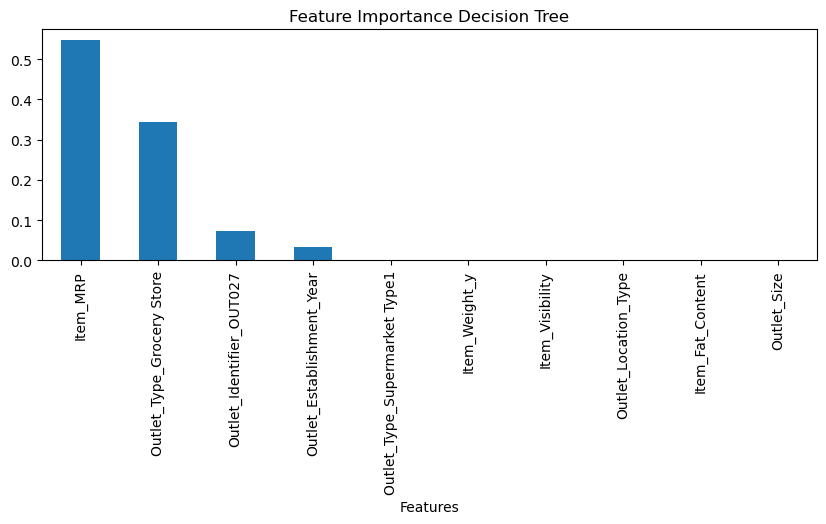

In [30]:
plt.figure(figsize= (10,3), dpi= 100)
pd.Series(DT.feature_importances_, index = x.columns).nlargest(10).plot(kind= 'bar')
plt.xlabel('Features')
plt.title('Feature Importance Decision Tree')

### 3. RandomForest

In [9]:
RF = RandomForestRegressor(random_state= 0,
                                     n_estimators= 260,
                                     max_depth= 6,
                                     min_samples_split= 5,
                                     min_samples_leaf= 24)

In [10]:
RF_score = baseline_score(RF, scaled_df, k= 5)

1 of KFold 5
RMSE on Train: 1011.0958819747731
RMSE on Valid: 1017.9792474039918
2 of KFold 5
RMSE on Train: 1012.8055300684744
RMSE on Valid: 1019.3662494005087
3 of KFold 5
RMSE on Train: 1006.2790306039168
RMSE on Valid: 1044.483482299538
4 of KFold 5
RMSE on Train: 1006.8822681905702
RMSE on Valid: 1041.0594555293137
5 of KFold 5
RMSE on Train: 1007.401737369262
RMSE on Valid: 1037.8103732334537
Mean RMSE on Training: 1008.8928896413994
Mean RMSE on Validation: 1032.1397615733613


Text(0.5, 1.0, 'Feature Importance Random Forest')

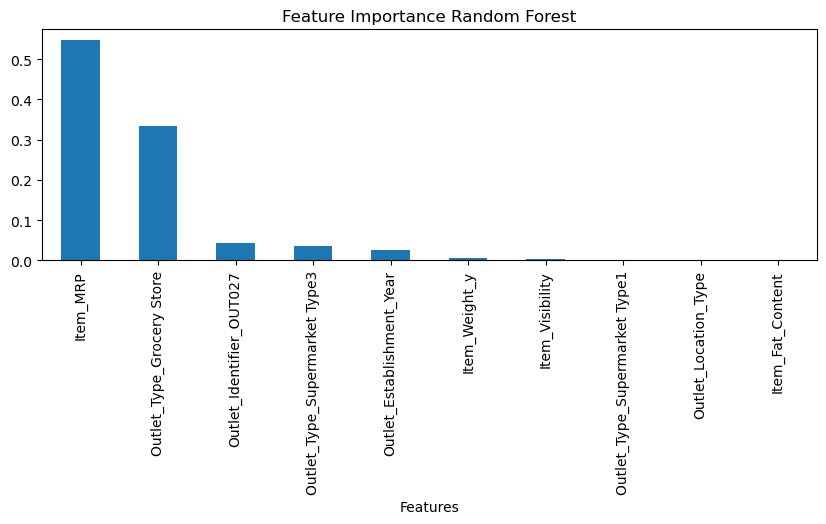

In [28]:
plt.figure(figsize= (10,3), dpi= 100)
pd.Series(RF.feature_importances_, index = x.columns).nlargest(10).plot(kind= 'bar')
plt.xlabel('Features')
plt.title('Feature Importance Random Forest')

### 4. XGBoost

In [11]:
XGB = XGBRegressor(n_estimators = 300,
                                 max_depth = 4,
                                    learning_rate = 0.01,
                                 min_child_weight = 10,
                                 gamma = 0,
                                 subsample= 0.6,
                                    n_jobs = 4,
                                    random_state = 0,
                                    objective = 'reg:squarederror')

In [12]:
XGB_score = baseline_score(XGB, scaled_df, k= 5)

1 of KFold 5
RMSE on Train: 1019.8857988705249
RMSE on Valid: 1013.2917049324794
2 of KFold 5
RMSE on Train: 1020.3720915154416
RMSE on Valid: 1032.699712007009
3 of KFold 5
RMSE on Train: 1014.5244971554223
RMSE on Valid: 1051.7745774161322
4 of KFold 5
RMSE on Train: 1015.796765323943
RMSE on Valid: 1046.8942293096331
5 of KFold 5
RMSE on Train: 1015.837788787291
RMSE on Valid: 1041.6030922545863
Mean RMSE on Training: 1017.2833883305245
Mean RMSE on Validation: 1037.252663183968


Text(0.5, 1.0, 'Feature Importance XGBoost')

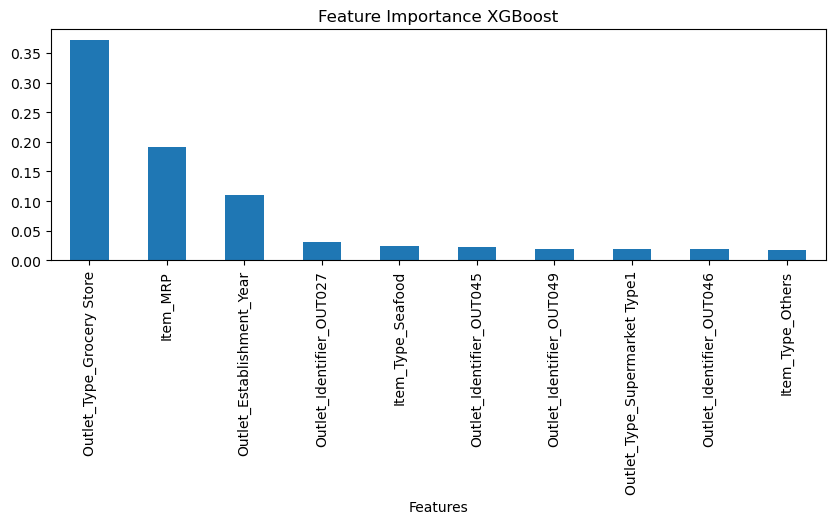

In [29]:
plt.figure(figsize= (10,3), dpi= 100)
pd.Series(XGB.feature_importances_, index = x.columns).nlargest(10).plot(kind= 'bar')
plt.xlabel('Features')
plt.title('Feature Importance XGBoost')

In [13]:
a = ({'LR': LR_score,
      'DT': DT_score,
      'RF': RF_score,
      'XGB': XGB_score})
a= pd.DataFrame([a])
a

,LR,DT,RF,XGB
0,1077.282587,1037.212699,1032.139762,1037.252663


<Figure size 100x100 with 0 Axes>

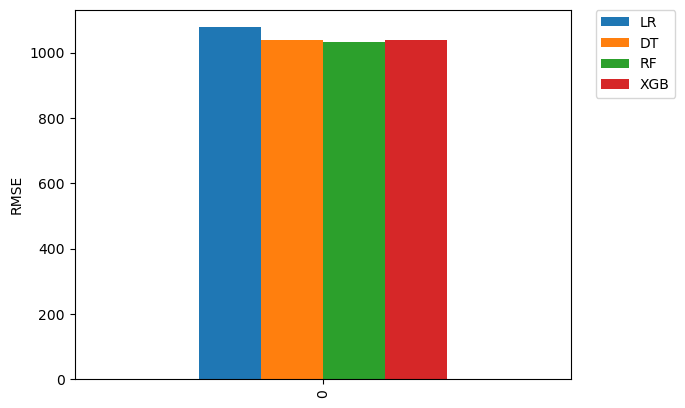

In [14]:
plt.figure(figsize=(1,1), dpi= 100)
a.plot(kind= 'bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('RMSE')
plt.show()

# TEST PREDICTIONS

finally we will use the Random Forest Model to predict the results, as it has given us the Lowest RMSE.

In [61]:
test_df = pd.read_csv('final_test.csv')
test_raw = pd.read_csv('bigmart_test.csv')
test_df.shape, test_raw.shape

((5681, 37), (5681, 11))

In [56]:
ss= StandardScaler()

test_array = ss.fit_transform(test_df)

scaled_test = pd.DataFrame(test_array, columns= test_df.columns)
scaled_test.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight_y,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.740811,-1.134077,-0.536555,0.139891,0.284737,-1.369215,1.736744,-0.289033,-0.172954,-0.116445,...,-0.257009,-0.351274,-0.350008,-0.349691,-0.350008,2.857079,-0.381568,0.726900,-0.349374,-0.351274
1,1.349873,-0.531850,-0.868937,1.095512,0.284737,-0.138827,-0.941284,-0.289033,-0.172954,-0.116445,...,-0.257009,-0.351274,-0.350008,-0.349691,-0.350008,-0.350008,-0.381568,0.726900,-0.349374,-0.351274
2,-0.740811,0.661316,1.629848,0.020438,0.284737,1.091560,0.413863,-0.289033,-0.172954,-0.116445,...,-0.257009,-0.351274,-0.350008,-0.349691,-0.350008,-0.350008,2.620767,-1.375706,-0.349374,-0.351274
3,-0.740811,-0.981416,0.226697,1.095512,0.284737,-0.138827,-1.153160,-0.289033,-0.172954,-0.116445,...,-0.257009,-0.351274,-0.350008,-0.349691,-0.350008,-0.350008,-0.381568,0.726900,-0.349374,-0.351274
4,1.349873,1.032540,1.508110,-1.532446,0.284737,1.091560,0.198760,-0.289033,-0.172954,-0.116445,...,-0.257009,2.846782,-0.350008,-0.349691,-0.350008,-0.350008,-0.381568,-1.375706,-0.349374,2.846782


In [67]:
rf_preds = RF.predict(scaled_test)

preds = pd.DataFrame(rf_preds, columns= ['Item_Outlet_Sales'])

In [69]:
pred_df = pd.concat([test_raw, preds], axis= 1)
pred_df.shape

(5681, 12)

In [73]:
pred_df.drop(columns= ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'], axis=1, inplace= True)

In [75]:
pred_df.to_csv('bigmart_preds.csv', index= False)

In [79]:
pred_df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1659.252949
1,FDW14,OUT017,1347.077043
2,NCN55,OUT010,612.210450
3,FDQ58,OUT017,2467.302777
4,FDY38,OUT027,5422.758213
...,...,...,...
5676,FDB58,OUT046,2145.529202
5677,FDD47,OUT018,2567.607318
5678,NCO17,OUT045,1917.509939
5679,FDJ26,OUT017,3617.022418
